No 'See also' section found.
Prerequisites for Graph (discrete mathematics): []
No 'See also' section found.
Advanced Topics for Graph (discrete mathematics): []
Learning Path: -> Graph (discrete mathematics)
No 'See also' section found.
Prerequisites for Graph (discrete mathematics): []
No 'See also' section found.
Advanced Topics for Graph (discrete mathematics): []


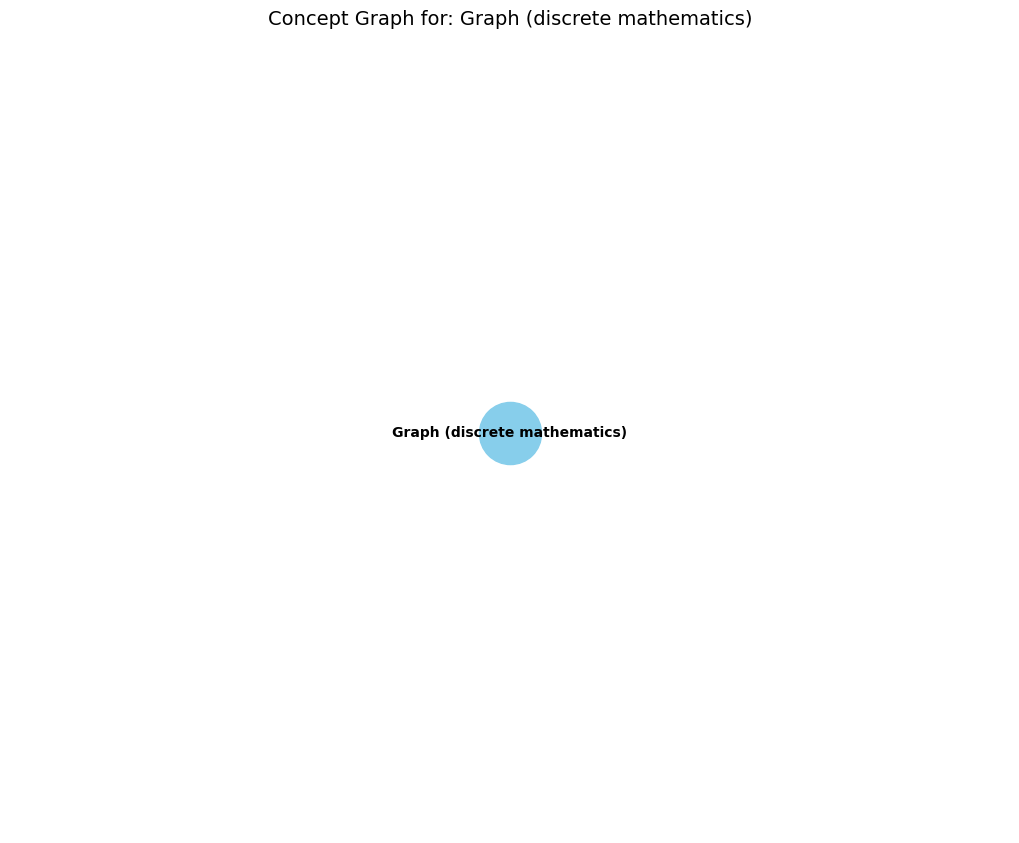

In [10]:
import wikipediaapi
from bs4 import BeautifulSoup
import networkx as nx
import requests
import matplotlib.pyplot as plt

def get_prerequisites(concept):
    # This function returns prerequisite concepts (behind concepts) for the given concept
    wiki_wiki = wikipediaapi.Wikipedia('en', headers={'User-Agent': 'MyWikipediaBot/1.0'})
    page = wiki_wiki.page(concept)
    prerequisites = []
    
    if page.exists():
        # Get the raw HTML of the page
        page_url = page.fullurl
        response = requests.get(page_url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
        
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find all section headings before "See also"
        sections = soup.find_all('span', {'class': 'mw-headline'})
        found_see_also = False
        for section in sections:
            if 'See also' in section.get_text():  # Stop when the "See also" section is found
                found_see_also = True
                break
            prerequisites.append(section.get_text())  # Add section name to prerequisites
        
        if not found_see_also:
            print("No 'See also' section found.")
                
    return prerequisites

def get_advanced_topics(concept):
    # This function returns advanced topics (beyond concepts) for the given concept
    wiki_wiki = wikipediaapi.Wikipedia('en', headers={'User-Agent': 'MyWikipediaBot/1.0'})
    page = wiki_wiki.page(concept)
    advanced_topics = []

    if page.exists():
        # Get the raw HTML of the page
        page_url = page.fullurl
        response = requests.get(page_url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
        
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the "See also" section (header h2)
        see_also_section = soup.find('span', {'id': 'See_also'})
        if see_also_section:
            # Find the parent of the "See also" span which is usually a h2 header
            see_also_header = see_also_section.find_parent('h2')
            if see_also_header:
                # Get the next sibling which contains the list of topics
                advanced_list = see_also_header.find_next('ul')
                if advanced_list:
                    for li in advanced_list.find_all('li'):
                        advanced_topics.append(li.get_text())
        else:
            print("No 'See also' section found.")
                
    return advanced_topics

def build_concept_graph(concept):
    G = nx.DiGraph()  # Directed graph to enforce the concept order

    # Add the initial concept
    G.add_node(concept)

    # Get prerequisites (behind concepts) and make them point to the given concept
    prerequisites = get_prerequisites(concept)
    print(f"Prerequisites for {concept}: {prerequisites}")  # Debugging line
    for prereq in prerequisites:
        G.add_edge(prereq, concept)  # Prerequisite -> Concept

    # Get advanced topics (beyond concepts) and make the given concept point to them
    advanced_topics = get_advanced_topics(concept)
    print(f"Advanced Topics for {concept}: {advanced_topics}")  # Debugging line
    for advanced in advanced_topics:
        G.add_edge(concept, advanced)  # Concept -> Advanced Topic

    return G

def generate_learning_path(concept):
    # Build the graph and get a topologically sorted learning path
    concept_graph = build_concept_graph(concept)
    
    try:
        # Perform topological sorting to ensure the right order
        path = list(nx.topological_sort(concept_graph))
        return path
    except nx.NetworkXUnfeasible:
        # This exception occurs if there are cycles in the graph (which shouldn't happen if data is correct)
        return "Error: Cyclic dependency detected. Unable to generate a learning path."

def plot_graph(concept):
    # Build the graph and plot it
    concept_graph = build_concept_graph(concept)
    
    # Generate positions for nodes
    pos = nx.spring_layout(concept_graph, seed=42)
    
    # Plot the graph
    plt.figure(figsize=(10, 8))
    nx.draw(concept_graph, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title(f"Concept Graph for: {concept}", fontsize=14)
    plt.show()

def print_learning_path(concept):
    # Get the learning path and print it in a "->concept" format
    learning_path = generate_learning_path(concept)
    
    if isinstance(learning_path, list):
        path_string = "->".join(learning_path)  # Join the concepts with "->"
        print("Learning Path:", "->", path_string)
    else:
        print(learning_path)  # Print error message if there's an issue

# Taking input from the user
concept = input("Enter the concept for the learning path: ")

# Print the learning path as a list
print_learning_path(concept)

# Plot the graph
plot_graph(concept)


In [27]:
import requests
from bs4 import BeautifulSoup

def get_see_also_section(concept):
    # Construct the Wikipedia page URL
    url = f'https://en.wikipedia.org/wiki/{concept.replace(" ", "_")}'
    
    # Send GET request to fetch the page content
    response = requests.get(url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
    
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the "See also" section
        see_also_section = soup.find('h2', {'id': 'See_also'})
        
        if see_also_section:
            # Find the next sibling <ul> containing the list of links
            advanced_list = see_also_section.find_next('ul')
            
            # Print the advanced topics from the "See also" section
            if advanced_list:
                print("Advanced Topics from 'See also' section:")
                for li in advanced_list.find_all('li'):
                    print(li.get_text())
            else:
                print("No list found under 'See also'.")
        else:
            print("No 'See also' section found.")
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Take user input for the concept
concept = input("Enter the concept for the 'See also' section: ")

# Call the function to print the "See also" section
get_see_also_section(concept)


Advanced Topics from 'See also' section:
Automated machine learning – Process of automating the application of machine learning
Big data – Extremely large or complex datasets
Deep learning — branch of ML concerned with artificial neural networks
Differentiable programming – Programming paradigm
List of datasets for machine-learning research – Machine learning based fault detection in Electronics Circuit
M-theory (learning framework)


In [26]:
import requests

def get_prerequisites_using_links(concept):
    # Wikipedia API URL for 'What links here' section
    url = f"https://en.wikipedia.org/w/api.php?action=query&titles={concept.replace(' ', '_')}&prop=linkshere&lhnamespace=0&format=json"
    
    # Send GET request to fetch the data
    response = requests.get(url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
    
    if response.status_code == 200:
        data = response.json()
        
        # Get the page ID from the response
        page_id = list(data['query']['pages'].keys())[0]
        
        # If the page exists, extract the linked pages (prerequisites)
        if 'linkshere' in data['query']['pages'][page_id]:
            prerequisites = []
            for link in data['query']['pages'][page_id]['linkshere']:
                prerequisites.append(link['title'])
            
            # Print the prerequisites
            print(f"Prerequisites for '{concept}':")
            for prereq in prerequisites:
                print(prereq)
        else:
            print(f"No links found for '{concept}' in 'What links here'.")
    else:
        print(f"Failed to retrieve the data. Status code: {response.status_code}")

# Take user input for the concept
concept = input("Enter the concept for prerequisites: ")

# Get and print the prerequisites
get_prerequisites_using_links(concept)


Prerequisites for 'Machine learning':
Artificial intelligence
Aesthetics
List of artificial intelligence projects
Analysis of algorithms
Audio signal processing
AMD
Adware
Biostatistics
Boltzmann distribution
Bioinformatics


concepts from current website

In [39]:
import requests
from bs4 import BeautifulSoup

def get_concept_names_in_first_paragraph(concept):
    # Wikipedia URL for the given concept
    url = f"https://en.wikipedia.org/wiki/{concept.replace(' ', '_')}"
    
    # Send GET request to fetch the page content
    response = requests.get(url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
    
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the first <p> tag within the main content
        first_paragraph = soup.find('p')
        
        if first_paragraph:
            # Find all <a> tags inside the first <p> tag
            hyperlinks = first_paragraph.find_all('a', href=True)
            
            # Extract and print the text (concept name) of each <a> tag, excluding citations
            if hyperlinks:
                print(f"Basic concepts in the '{concept}' page:")
                for link in hyperlinks:
                    # Exclude citation links (those that start with '#cite_note')
                    if not link['href'].startswith('#cite_note'):
                        print(f"- {link.get_text()}")
            else:
                print("No hyperlinks found in the first paragraph.")
        else:
            print("No paragraph found.")
    else:
        print(f"Failed to retrieve the data. Status code: {response.status_code}")

# Taking input from the user
concept = input("Enter the concept for extracting concepts in the first paragraph: ")

# Get and print concept names from the first paragraph
get_concept_names_in_first_paragraph(concept)


Basic concepts in the 'Machine Learning' page:
- field of study
- artificial intelligence
- statistical algorithms
- data
- generalize
- tasks
- instructions
- deep learning
- neural networks


In [32]:
import requests
from bs4 import BeautifulSoup

def get_concept_names_from_all_paragraphs(concept):
    # Wikipedia URL for the given concept
    url = f"https://en.wikipedia.org/wiki/{concept.replace(' ', '_')}"
    
    # Send GET request to fetch the page content
    response = requests.get(url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
    
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the div that contains the content of the article
        content_div = soup.find('div', {'class': 'mw-parser-output'})
        
        if content_div:
            # Find all <p> tags within the content div (which is where the article content is)
            paragraphs = content_div.find_all('p')
            
            # List to store the concepts (hyperlinks) from all paragraphs
            extracted_concepts = []
            
            for p in paragraphs:
                # Find all <a> tags inside each <p> tag
                hyperlinks = p.find_all('a', href=True)
                
                for link in hyperlinks:
                    # Exclude citation links by checking the href attribute
                    href = link['href']
                    if href.startswith('#cite_note'):
                        continue
                    
                    # Extract the concept names (text of the <a> tag)
                    concept_name = link.get_text().strip()
                    if concept_name:
                        extracted_concepts.append(concept_name)
            
            if extracted_concepts:
                print(f"Concepts found in all paragraphs of '{concept}':")
                for concept in extracted_concepts:
                    print(f"- {concept}")
            else:
                print("No concepts found in any paragraph.")
        else:
            print("No content found in the article.")
    else:
        print(f"Failed to retrieve the data. Status code: {response.status_code}")

# Taking input from the user
concept = input("Enter the concept for extracting concepts from all paragraphs: ")

# Get and print concept names from all paragraphs
get_concept_names_from_all_paragraphs(concept)


Concepts found in all paragraphs of 'Machine learning':
- field of study
- artificial intelligence
- statistical algorithms
- data
- generalize
- tasks
- instructions
- deep learning
- neural networks
- natural language processing
- computer vision
- speech recognition
- email filtering
- agriculture
- medicine
- predictive analytics
- Statistics
- mathematical optimization
- Data mining
- exploratory data analysis
- unsupervised learning
- probably approximately correct (PAC) learning
- Arthur Samuel
- IBM
- computer gaming
- artificial intelligence
- Arthur Samuel
- program
- Canadian
- Donald Hebb
- The Organization of Behavior
- theoretical neural structure
- nerve cells
- neurons
- artificial neurons
- cognitive systems
- Walter Pitts
- Warren McCulloch
- algorithms
- punched tape
- Raytheon Company
- sonar
- electrocardiograms
- reinforcement learning
- goof
- artificial neural network
- Tom M. Mitchell
- operational definition
- Alan Turing
- Computing Machinery and Intelligence

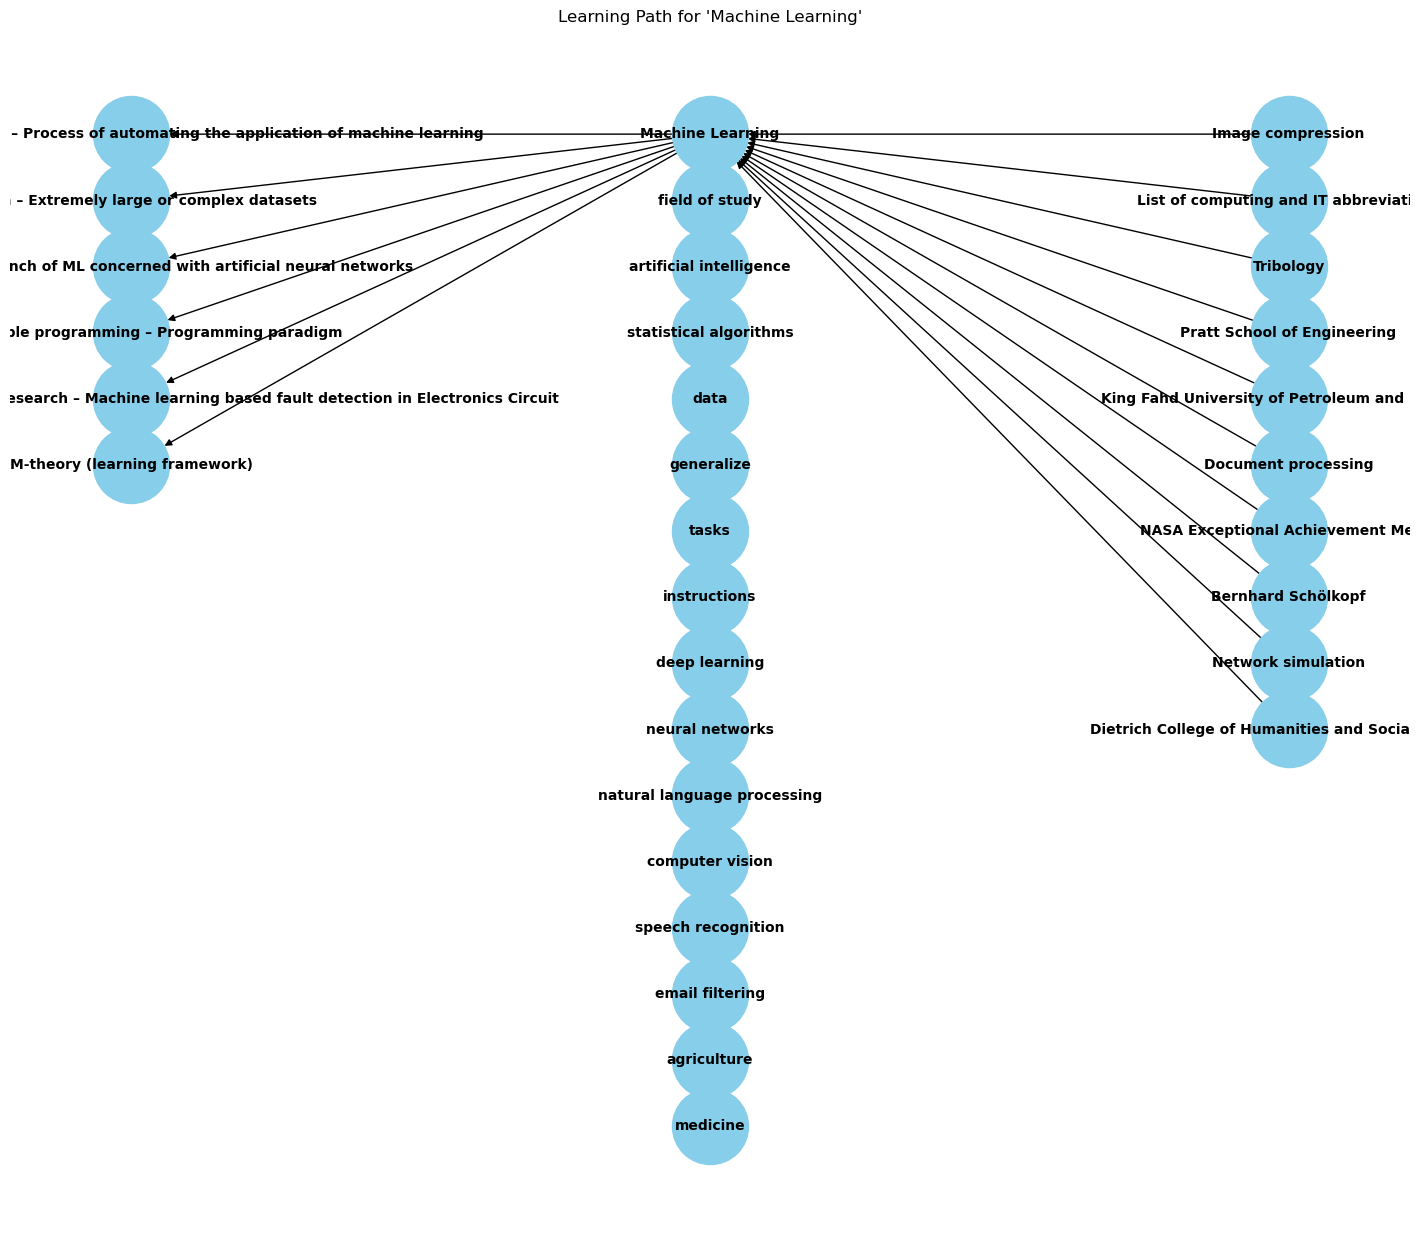

Learning Path:
Image compression -> List of computing and IT abbreviations -> Tribology -> Pratt School of Engineering -> King Fahd University of Petroleum and Minerals -> Document processing -> NASA Exceptional Achievement Medal -> Bernhard Schölkopf -> Network simulation -> Dietrich College of Humanities and Social Sciences -> Machine Learning -> field of study -> artificial intelligence -> statistical algorithms -> data -> generalize -> tasks -> instructions -> deep learning -> neural networks -> natural language processing -> computer vision -> speech recognition -> email filtering -> agriculture -> medicine -> Automated machine learning – Process of automating the application of machine learning -> Big data – Extremely large or complex datasets -> Deep learning — branch of ML concerned with artificial neural networks -> Differentiable programming – Programming paradigm -> List of datasets for machine-learning research – Machine learning based fault detection in Electronics Circuit

In [36]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Function to get prerequisites using 'What links here' API
def get_prerequisites(concept):
    url = f"https://en.wikipedia.org/w/api.php?action=query&titles={concept.replace(' ', '_')}&prop=linkshere&lhnamespace=0&format=json"
    response = requests.get(url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
    
    prerequisites = []
    if response.status_code == 200:
        data = response.json()
        page_id = list(data['query']['pages'].keys())[0]
        if 'linkshere' in data['query']['pages'][page_id]:
            for link in data['query']['pages'][page_id]['linkshere']:
                prerequisites.append(link['title'])
    return prerequisites

# Function to get concepts from the current page
def get_concepts_from_page(concept):
    url = f"https://en.wikipedia.org/wiki/{concept.replace(' ', '_')}"
    response = requests.get(url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
    
    concepts = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        content_div = soup.find('div', {'class': 'mw-parser-output'})
        
        if content_div:
            paragraphs = content_div.find_all('p')
            for p in paragraphs[:15]:  # Limiting to the first 15 <p> elements
                hyperlinks = p.find_all('a', href=True)
                for link in hyperlinks:
                    href = link['href']
                    if not href.startswith('#cite_note'):  # Exclude citation links
                        concept_name = link.get_text().strip()
                        if concept_name:
                            concepts.append(concept_name)
    return concepts

# Function to get 'See also' section (advanced topics)
def get_advanced_concepts(concept):
    url = f'https://en.wikipedia.org/wiki/{concept.replace(" ", "_")}'
    response = requests.get(url, headers={'User-Agent': 'MyWikipediaBot/1.0'})
    
    advanced_topics = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        see_also_section = soup.find('h2', {'id': 'See_also'})
        
        if see_also_section:
            advanced_list = see_also_section.find_next('ul')
            if advanced_list:
                for li in advanced_list.find_all('li'):
                    advanced_topics.append(li.get_text().strip())
    return advanced_topics

# Function to create a graph for the learning path and print the path
def create_learning_path_graph(concept):
    # Get prerequisites, current page concepts, and advanced topics
    prerequisites = get_prerequisites(concept)
    current_concepts = get_concepts_from_page(concept)
    advanced_concepts = get_advanced_concepts(concept)
    
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for the current page and advanced topics
    G.add_node(concept, label=' ')

    # Add prerequisites and advanced topics as nodes
    for prereq in prerequisites:
        G.add_node(prereq, label=' ')
        G.add_edge(prereq, concept)

    for adv_concept in advanced_concepts:
        G.add_node(adv_concept, label=' ')
        G.add_edge(concept, adv_concept)

    # Add edges for concepts within the current page
    for current in current_concepts[:15]:  # Limit to 15 current concepts
        G.add_node(current, label=' ')
        G.add_edge(concept, current)

    # Define custom positions for the nodes
    pos = {}
    
    # Position for prerequisites (right side)
    for i, prereq in enumerate(prerequisites):
        pos[prereq] = (2, -i)  # x=2 for right side, y varies
    
    # Position for current page (middle)
    pos[concept] = (0, 0)  # Center node
    
    # Position for current concepts (middle, right)
    for i, current in enumerate(current_concepts[:15]):
        pos[current] = (0, -i - 1)  # y varies, stacked vertically below current
    
    # Position for advanced concepts (left side)
    for i, adv_concept in enumerate(advanced_concepts):
        pos[adv_concept] = (-2, -i)  # x=-2 for left side, y varies

    # Increase the figure size to avoid overlap and set more spacing for labels
    plt.figure(figsize=(14, 12))  # Increase the figure size to 14x12 inches
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
    
    # Draw labels with adjusted position (move them slightly away from the nodes)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_size=8, verticalalignment="center", horizontalalignment="center")

    # Show the plot
    plt.title(f"Learning Path for '{concept}'")
    plt.show()

    # Print the learning path in the '->' format
    print("Learning Path:")
    # Print prerequisites -> current page -> current concepts -> advanced concepts
    path = " -> ".join(prerequisites + [concept] + current_concepts[:15] + advanced_concepts)
    print(path)

# Main code to run the entire process
concept = input("Enter the concept for creating a learning path: ")
create_learning_path_graph(concept)
